In [1]:
'''This script goes along the blog post
"Building powerful image classification models using very little data"
from blog.keras.io.
It uses data that can be downloaded at:
https://www.kaggle.com/c/dogs-vs-cats/data
In our setup, we:
- created a data/ folder
- created train/ and validation/ subfolders inside data/
- created cats/ and dogs/ subfolders inside train/ and validation/
- put the cat pictures index 0-999 in data/train/cats
- put the cat pictures index 1000-1400 in data/validation/cats
- put the dogs pictures index 12500-13499 in data/train/dogs
- put the dog pictures index 13500-13900 in data/validation/dogs
So that we have 1000 training examples for each class, and 400 validation examples for each class.
In summary, this is our directory structure:
```
data/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
```
'''

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

import matplotlib.pyplot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from urllib import urlretrieve
import cPickle as pickle
import os
import gzip
import numpy as np
import theano
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

Using TensorFlow backend.
/Users/waihamyee/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [10]:
# dimensions of our images.
img_width, img_height = 28, 28

train_data_dir = 'classes/train'
validation_data_dir = 'classes/validation'

In [11]:
nb_train_samples = 400
nb_validation_samples = 172
nb_epoch = 10

In [12]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(3, img_width, img_height)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [13]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=20,
        class_mode='binary')

Found 798 images belonging to 2 classes.
Found 342 images belonging to 2 classes.


In [15]:
# Train the network
model.fit_generator(
        train_generator,
        samples_per_epoch=500,
        nb_epoch=50,
        validation_data=validation_generator,
        nb_val_samples=172)
print "Done!!"

model.save_weights('first_try.h5')

Epoch 1/50
518/500 [===============================] - 2s - loss: 0.5413 - acc: 0.7413 - val_loss: 0.5766 - val_acc: 0.7111
Epoch 2/50
500/500 [==============================] - 2s - loss: 0.5477 - acc: 0.7300 - val_loss: 0.5737 - val_acc: 0.7222
Epoch 3/50
518/500 [===============================] - 2s - loss: 0.4939 - acc: 0.7645 - val_loss: 0.5111 - val_acc: 0.7889
Epoch 4/50
518/500 [===============================] - 2s - loss: 0.4979 - acc: 0.7529 - val_loss: 0.5979 - val_acc: 0.6944
Epoch 5/50
500/500 [==============================] - 2s - loss: 0.4989 - acc: 0.7720 - val_loss: 0.5305 - val_acc: 0.7278
Epoch 6/50
518/500 [===============================] - 2s - loss: 0.5103 - acc: 0.7375 - val_loss: 0.5970 - val_acc: 0.6889
Epoch 7/50
518/500 [===============================] - 2s - loss: 0.4518 - acc: 0.7992 - val_loss: 0.5288 - val_acc: 0.7333
Epoch 8/50
500/500 [==============================] - 2s - loss: 0.4924 - acc: 0.7820 - val_loss: 0.5137 - val_acc: 0.7556
Epoch 9/50


TypeError: Invalid dimensions for image data

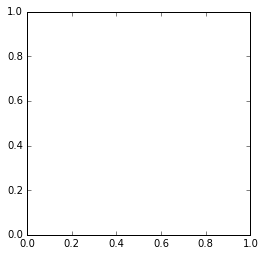

In [87]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('classes/validation/nike/669.png')  # this is a PIL image
#x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

plt.imshow(x[0][0], cmap=cm.binary)

In [278]:
from PIL import Image
import pandas as pd
import glob

image_list_j = []
for filename in glob.glob('classes/traino/jordans/*.jpg'):
    im=Image.open(filename)
    image_list_j.append(im)

jordans_train = map(lambda x: img_to_array(x),image_list_j)
jordan_pd = pd.DataFrame()
jordan_pd['image'] = jordans_train
jordan_pd['brand'] = 'Jordan'

image_list_n = []
for filename in glob.glob('classes/traino/nikes/*.jpg'):
    im=Image.open(filename)
    image_list_n.append(im)

nikes_train = map(lambda x: img_to_array(x),image_list_n)
nikes_train = map(lambda x: x.reshape((1,) + x.shape), nikes_train)
nike_pd = pd.DataFrame()
nike_pd['image'] = nikes_train
nike_pd['brand'] = 'Nike'

frames = [jordan_pd, nike_pd]
X = pd.concat(frames,ignore_index=True)

In [279]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X['image'], X['brand'], test_size=0.2, random_state=0)

print len(X_train)
print len(X_test)
print len(y_train)
print len(y_test)

1512
379
1512
379


In [280]:
X[X.index.duplicated()]

,image,brand


In [271]:
print X

                                                  image   brand
0     [[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 2...  Jordan
1     [[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 2...  Jordan
2     [[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 2...  Jordan
3     [[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 2...  Jordan
4     [[[252.0, 252.0, 252.0, 252.0, 252.0, 252.0, 2...  Jordan
5     [[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 2...  Jordan
6     [[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 2...  Jordan
7     [[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 2...  Jordan
8     [[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 2...  Jordan
9     [[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 2...  Jordan
10    [[[246.0, 254.0, 255.0, 254.0, 255.0, 255.0, 2...  Jordan
11    [[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 2...  Jordan
12    [[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 2...  Jordan
13    [[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 2...  Jordan
14    [[[255.0, 255.0, 255.0, 255.0, 255

In [281]:
net1 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('dense', layers.DenseLayer),
            ('dropout2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    # input layer
    input_shape=(None, 1, 28, 28),
    # layer conv2d1
    conv2d1_num_filters=32,
    conv2d1_filter_size=(5, 5),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),  
    # layer maxpool1
    maxpool1_pool_size=(2, 2),    
    # layer conv2d2
    conv2d2_num_filters=32,
    conv2d2_filter_size=(5, 5),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    # layer maxpool2
    maxpool2_pool_size=(2, 2),
    # dropout1
    dropout1_p=0.5,    
    # dense
    dense_num_units=256,
    dense_nonlinearity=lasagne.nonlinearities.rectify,    
    # dropout2
    dropout2_p=0.5,    
    # output
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    # optimization method params
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,
    max_epochs=10,
    verbose=1,
    )
# Train the network
nn = net1.fit(X_train, y_train)

print "Done!!"

# Neural Network with 160362 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     1x28x28
  1  conv2d1   32x24x24
  2  maxpool1  32x12x12
  3  conv2d2   32x8x8
  4  maxpool2  32x4x4
  5  dropout1  32x4x4
  6  dense     256
  7  dropout2  256
  8  output    10



ValueError: ('Bad input argument to theano function with name "/Users/waihamyee/anaconda/lib/python2.7/site-packages/nolearn/lasagne/base.py:518"  at index 0(0-based)', 'setting an array element with a sequence.')